In [38]:
import os
import sys 
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import plotly
import plotly.graph_objects as go
import plotly.express as px
import kaleido ##pip install -U kaleido ##to save a plotly fig
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict

In [39]:
df1 = pd.read_csv('Stable_Data_CSV.csv')
df2 = pd.read_csv('all_features.csv')
df_stable = df2[df2.set_index(['participant_id']).index.isin(df1.set_index(['participant_id']).index)]

In [40]:
df_stable_US = df_stable.loc[(df_stable['arm'] == 1)]
df_stable_WN = df_stable.loc[(df_stable['arm'] == 2)]
df_stable_US=df_stable_US.drop(['participant_id','arm'],axis=1)
df_stable_WN=df_stable_WN.drop(['participant_id','arm'],axis=1)
print(len(df_stable_US))
print(len(df_stable_WN))
#df_stable_US=(df_stable_US[['c_3','sl_1','a_2','q_1','tfi_total.1','tfi_total.2','tfi_total.3']])
#df_stable_WN=(df_stable_WN[['sl_2','r_1','e_1','tfi_total.1','tfi_total.2','tfi_total.3']])

df_stable_WN

31
30


,i_1,i_2,i_3,sc_1,sc_2,sc_3,c_1,c_2,c_3,sl_1,...,i_sub.2,sc_sub.2,c_sub.2,sl_sub.2,a_sub.2,r_sub.2,q_sub.2,e_sub.2,tfi_total.2,tfi_total.3
51,8.0,8.0,7.0,8.0,7.0,6.0,6.0,6.0,5.0,8.0,...,66.7,66.7,50.0,73.3,83.3,90.0,75.0,73.3,72.4,80.4
52,8.0,7.0,7.0,9.0,6.0,8.0,6.0,6.0,5.0,6.0,...,80.0,93.3,73.3,56.7,46.7,63.3,52.5,50.0,64.0,71.2
53,7.0,8.0,5.0,8.0,8.0,8.0,6.0,6.0,6.0,8.0,...,70.0,83.3,50.0,63.3,70.0,66.7,47.5,36.7,60.4,64.8
55,4.0,6.0,3.0,6.0,5.0,5.0,1.0,1.0,1.0,7.0,...,26.7,33.3,3.3,20.0,60.0,56.7,10.0,16.7,27.6,44.8
56,7.0,7.0,5.0,10.0,6.0,5.0,2.0,3.0,3.0,3.0,...,60.0,73.3,50.0,46.7,73.3,40.0,45.0,56.7,55.2,70.0
57,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,...,33.3,23.3,10.0,0.0,23.3,10.0,7.5,6.7,14.0,14.0
59,6.0,6.0,6.0,8.0,6.0,7.0,5.0,4.0,4.0,8.0,...,43.3,46.7,16.7,13.3,13.3,66.7,5.0,10.0,26.0,37.6
60,9.0,8.0,7.0,10.0,7.0,10.0,8.0,7.0,6.0,10.0,...,80.0,86.7,70.0,70.0,76.7,93.3,72.5,40.0,73.6,83.2
61,6.0,6.0,3.0,10.0,7.0,6.0,5.0,5.0,5.0,6.0,...,40.0,66.7,53.3,3.3,33.3,30.0,12.5,50.0,35.2,42.8
63,8.0,8.0,8.0,5.0,6.0,6.0,6.0,6.0,5.0,1.0,...,36.7,23.3,26.7,20.0,100.0,30.0,80.0,23.3,44.0,35.2


In [41]:
# with scaled data
n_epochs=100
n_batch_size=32 #batch training
n_timesteps=3
n_features=34
lr=0.01
kfold = KFold(n_splits=5)
error_scores_US=[]
error_scores_WN=[]

def data_prep(df):
    sc_x=StandardScaler()
    sc_y=StandardScaler()
    ## Separate dependent and independent features 
    X=df.drop(['tfi_total.3'],axis=1).values
    y = df[['tfi_total.3']].values
    #scale x
    x_scaler=sc_x.fit(X)
    X=x_scaler.transform(X)
    #scale y
    y_scaler=sc_y.fit(y)
    y=y_scaler.transform(y)
    # Reshape input to be 3D for LSTM[samples, timesteps, features]
    X = X.reshape((X.shape[0],n_timesteps,n_features))
    print(X.shape,y.shape)
    input_shape=(n_timesteps,X.shape[2])
    print(input_shape)
    return X,y,input_shape,x_scaler,y_scaler

def create_lstm_model(input_shape,y_scaler):
    
    def error_in_tfi(y_true,y_pred): 
        y=y_true.numpy()
        yhat=y_pred.numpy()
        y=np.reshape(y, (1,-1))
        yhat=np.reshape(yhat, (1,-1))
        y=y_scaler.inverse_transform(y)
        yhat=y_scaler.inverse_transform(yhat)
        y=tf.convert_to_tensor(y, dtype=tf.float32)
        yhat=tf.convert_to_tensor(yhat, dtype=tf.float32)
        return K.mean(abs(y - yhat), axis=-1)  #K.mean(square(y_true - y_pred), axis=-1)
    
    K.clear_session
    input_shape=input_shape
    model = Sequential([
      LSTM(50, activation='relu',kernel_regularizer=regularizers.L1(0.001),input_shape=input_shape),
      Dropout(0.2), # 20% of Neuron will get deactivated during training
      Dense(1,kernel_initializer='normal',activation = 'linear')                      
    ])             

    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=lr),run_eagerly=True,metrics=[error_in_tfi])
    return model
    
def cross_val(df,error_scores):
    X,y,input_shape,x_scaler,y_scaler=data_prep(df)
    for train_index, test_index in kfold.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model=create_lstm_model(input_shape,y_scaler)
        history=model.fit(x_train, y_train,epochs=n_epochs,batch_size=n_batch_size,verbose =1)#validation_data=(x_test,y_test) #validation_split=0.2
        val_mse,val_mae=model.evaluate(x_test,y_test) #evaluating using unseen data, bcz validation is not used while model.fit
        error_scores.append(val_mae)
    return history,x_scaler,y_scaler,error_scores

US_history,US_x_scaler,US_y_scaler,US_error_scores=cross_val(df_stable_US,error_scores_US)
WN_history,WN_x_scaler,WN_y_scaler,WN_error_scores=cross_val(df_stable_WN,error_scores_WN)
    

(31, 3, 34) (31, 1)
(3, 34)
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30] TEST: [0 1 2 3 4 5 6]
Epoch 1/100
1/1 [==============================] - 0s 105ms/step - loss: 1.4749 - error_in_tfi: 16.9699
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 1.2162 - error_in_tfi: 13.9950
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 1.0451 - error_in_tfi: 12.7690
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 0.8602 - error_in_tfi: 10.5164
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.8643 - error_in_tfi: 10.5463
Epoch 6/100
1/1 [==============================] - 0s 36ms/step - loss: 0.7699 - error_in_tfi: 8.8514
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6286 - error_in_tfi: 7.9948
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 0.6079 - error_in_tfi: 7.7822
Epoch 9/100
1/1 [==============================

1/1 [==============================] - 0s 33ms/step - loss: 0.1638 - error_in_tfi: 3.3348
Epoch 54/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1421 - error_in_tfi: 2.1991
Epoch 55/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1394 - error_in_tfi: 2.8956
Epoch 56/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1286 - error_in_tfi: 2.3960
Epoch 57/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1469 - error_in_tfi: 3.3166
Epoch 58/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1357 - error_in_tfi: 2.6755
Epoch 59/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1478 - error_in_tfi: 2.8476
Epoch 60/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1362 - error_in_tfi: 3.1044
Epoch 61/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1245 - error_in_tfi: 2.1104
Epoch 62/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1389 - erro

1/1 [==============================] - 0s 33ms/step - loss: 1.0189 - error_in_tfi: 12.3313
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 0.8151 - error_in_tfi: 10.2255
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7041 - error_in_tfi: 8.7845
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7215 - error_in_tfi: 9.5692
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6512 - error_in_tfi: 8.4947
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6285 - error_in_tfi: 8.7666
Epoch 11/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6260 - error_in_tfi: 9.0312
Epoch 12/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5723 - error_in_tfi: 8.0106
Epoch 13/100
1/1 [==============================] - 0s 32ms/step - loss: 0.5346 - error_in_tfi: 7.8200
Epoch 14/100
1/1 [==============================] - 0s 32ms/step - loss: 0.4608 - error_

1/1 [==============================] - 0s 32ms/step - loss: 0.1678 - error_in_tfi: 3.1830
Epoch 61/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1491 - error_in_tfi: 2.6832
Epoch 62/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1422 - error_in_tfi: 2.5804
Epoch 63/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1437 - error_in_tfi: 2.6429
Epoch 64/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1416 - error_in_tfi: 2.5689
Epoch 65/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1476 - error_in_tfi: 2.2558
Epoch 66/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1276 - error_in_tfi: 2.2269
Epoch 67/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1383 - error_in_tfi: 2.7190
Epoch 68/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1330 - error_in_tfi: 2.7730
Epoch 69/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1251 - erro

1/1 [==============================] - 0s 34ms/step - loss: 0.2051 - error_in_tfi: 2.5092
Epoch 37/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1943 - error_in_tfi: 2.2540
Epoch 38/100
1/1 [==============================] - 0s 33ms/step - loss: 0.2051 - error_in_tfi: 3.1354
Epoch 39/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2086 - error_in_tfi: 3.2606
Epoch 40/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2521 - error_in_tfi: 4.6020
Epoch 41/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2517 - error_in_tfi: 4.2016
Epoch 42/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1795 - error_in_tfi: 2.4947
Epoch 43/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1997 - error_in_tfi: 3.5579
Epoch 44/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1813 - error_in_tfi: 3.1579
Epoch 45/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1665 - erro

1/1 [==============================] - 0s 31ms/step - loss: 0.1056 - error_in_tfi: 2.4274
Epoch 92/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0958 - error_in_tfi: 2.1618
Epoch 93/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0933 - error_in_tfi: 2.1959
Epoch 94/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1177 - error_in_tfi: 3.1849
Epoch 95/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0995 - error_in_tfi: 2.7374
Epoch 96/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0905 - error_in_tfi: 2.0488
Epoch 97/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1203 - error_in_tfi: 3.2053
Epoch 98/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0987 - error_in_tfi: 2.2493
Epoch 99/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0826 - error_in_tfi: 1.7842
Epoch 100/100
1/1 [==============================] - 0s 30ms/step - loss: 0.7016 - err

1/1 [==============================] - 0s 35ms/step - loss: 0.1547 - error_in_tfi: 2.5256
Epoch 44/100
1/1 [==============================] - 0s 40ms/step - loss: 0.1520 - error_in_tfi: 2.2235
Epoch 45/100
1/1 [==============================] - 0s 36ms/step - loss: 0.1567 - error_in_tfi: 2.5223
Epoch 46/100
1/1 [==============================] - 0s 37ms/step - loss: 0.1569 - error_in_tfi: 2.7475
Epoch 47/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1598 - error_in_tfi: 3.0894
Epoch 48/100
1/1 [==============================] - 0s 35ms/step - loss: 0.1394 - error_in_tfi: 2.3925
Epoch 49/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1329 - error_in_tfi: 2.3867
Epoch 50/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1237 - error_in_tfi: 1.9679
Epoch 51/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1233 - error_in_tfi: 2.0060
Epoch 52/100
1/1 [==============================] - 0s 37ms/step - loss: 0.1228 - erro

1/1 [==============================] - 0s 32ms/step - loss: 0.0989 - error_in_tfi: 2.8874
Epoch 99/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0816 - error_in_tfi: 1.7689
Epoch 100/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5927 - error_in_tfi: 13.7216


In [42]:
print(US_error_scores)
US_error=np.mean(US_error_scores)
print(US_error)
print(WN_error_scores)
WN_error=np.mean(WN_error_scores)
print(WN_error)

[11.811009407043457, 17.57143783569336, 21.580875396728516, 14.332746505737305, 5.920823097229004]
14.243378448486329
[15.225318908691406, 13.518732070922852, 11.042590141296387, 15.174139022827148, 13.721572875976562]
13.736470603942871


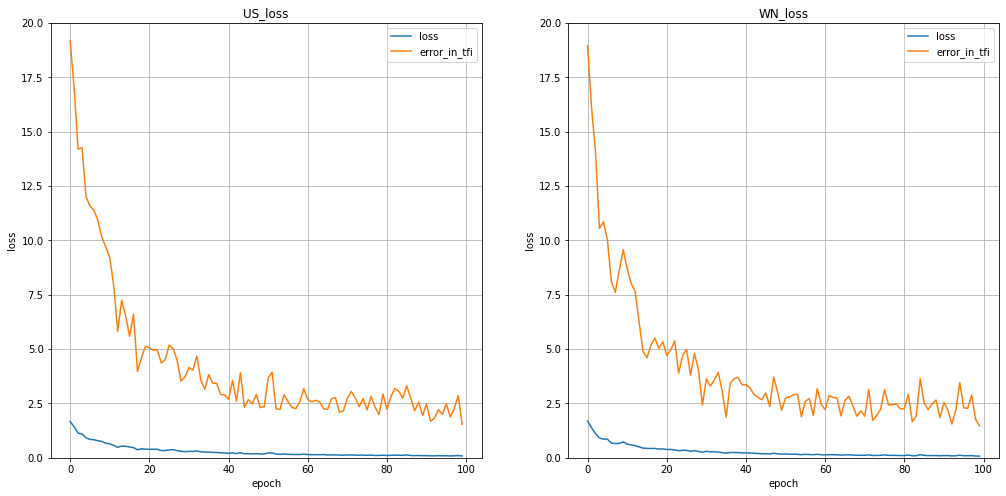

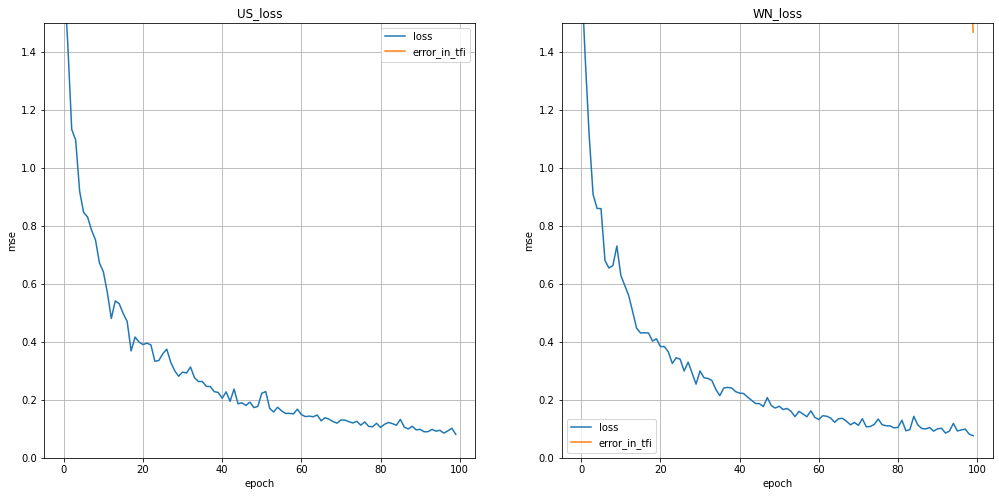

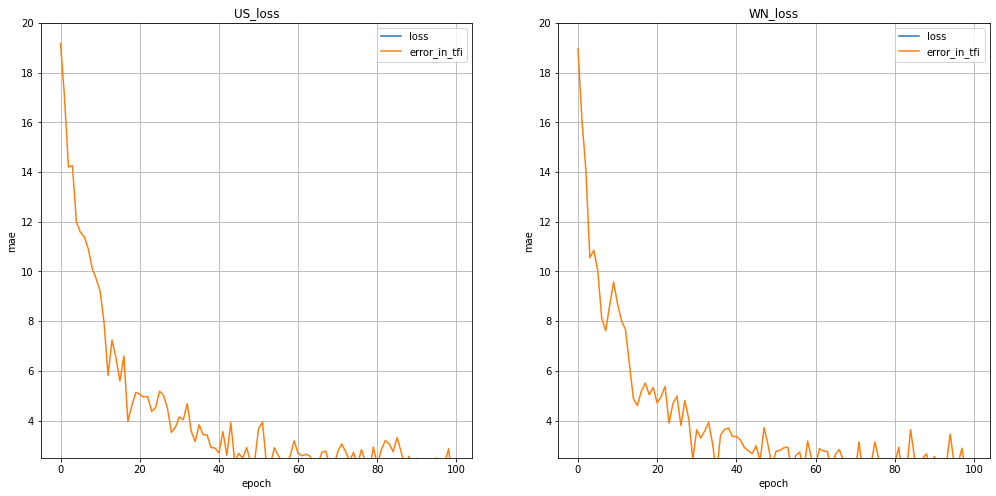

In [43]:
#show learning curves
#mean training loss measured over each epoch
#mean validation loss measured at the end of each epoch
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(US_history.history) #selecting columns
WN_plot = pd.DataFrame(WN_history.history)
US_plot.plot(ax=axes[0],ylim=(0,20),title="US_loss",xlabel='epoch',ylabel='loss').grid(True)
WN_plot.plot(ax=axes[1],ylim=(0,20),title="WN_loss",xlabel='epoch',ylabel='loss').grid(True)
plt.savefig("plots/loss_and_matrics.png")

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(US_history.history) #selecting columns
WN_plot = pd.DataFrame(WN_history.history)
US_plot.plot(ax=axes[0],ylim=(0,1.5),title="US_loss",xlabel='epoch',ylabel='mse').grid(True)
WN_plot.plot(ax=axes[1],ylim=(0,1.5),title="WN_loss",xlabel='epoch',ylabel='mse').grid(True)
plt.savefig("plots/loss.png")

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(US_history.history) #selecting columns
WN_plot = pd.DataFrame(WN_history.history)
US_plot.plot(ax=axes[0],ylim=(2.5,20),title="US_loss",xlabel='epoch',ylabel='mae').grid(True)
WN_plot.plot(ax=axes[1],ylim=(2.5,20),title="WN_loss",xlabel='epoch',ylabel='mae').grid(True)
plt.savefig("plots/matrics.png")

In [30]:
#without scaling
import keras.backend as K
from keras.layers import Dropout
n_epochs=40
n_batch_size=10
n_timesteps=3
n_features=34
lr=0.001
kfold = KFold(n_splits=5)
t_error_scores_US=[]
t_error_scores_WN=[]

def data_prep(df):
    ## Separate dependent and independent features 
    X=df.drop(['tfi_total.3'],axis=1).values
    y = df[['tfi_total.3']].values
    # Reshape input to be 3D for LSTM[samples, timesteps, features]
    X = X.reshape((X.shape[0],n_timesteps,n_features))
    print(X.shape,y.shape)
    input_shape=(n_timesteps,X.shape[2])
    print(input_shape)
    return X,y,input_shape
def create_lstm_model(input_shape):
    K.clear_session
    input_shape=input_shape
    model = Sequential([
      LSTM(50, activation='relu',kernel_regularizer=regularizers.L1(0.01),input_shape=input_shape),#kernel_initializer='normal'
      Dropout(0.2), # 20% of Neuron will get deactivated during training
      Dense(1,kernel_initializer='normal',activation = 'linear')                      
    ])             

    model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=lr))#metrics=['mae']
    return model

def cross_val(df,error_scores):
    X,y,input_shape=data_prep(df)
    for train_index, test_index in kfold.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model=create_lstm_model(input_shape)
        history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=n_epochs, batch_size=n_batch_size)
        val_mae=model.evaluate(x_test,y_test)
        error_scores.append(val_mae)
    return history,error_scores

t_US_history,t_US_error_scores=cross_val(df_stable_US,t_error_scores_US)
t_WN_history,t_WN_error_scores=cross_val(df_stable_WN,t_error_scores_WN)
    

(31, 3, 34) (31, 1)
(3, 34)
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30] TEST: [0 1 2 3 4 5 6]
Epoch 1/40


2022-05-24 10:59:57.718219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 105ms/step - loss: 41.4180 - val_loss: 44.5298
Epoch 2/40
3/3 [==============================] - 0s 30ms/step - loss: 38.4773 - val_loss: 41.5111
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 36.7290

2022-05-24 10:59:58.091747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 30ms/step - loss: 35.4439 - val_loss: 38.1483
Epoch 4/40
3/3 [==============================] - 0s 31ms/step - loss: 32.3394 - val_loss: 35.2424
Epoch 5/40
3/3 [==============================] - 0s 29ms/step - loss: 28.8250 - val_loss: 32.4670
Epoch 6/40
3/3 [==============================] - 0s 30ms/step - loss: 25.6692 - val_loss: 29.1371
Epoch 7/40
3/3 [==============================] - 0s 29ms/step - loss: 21.9346 - val_loss: 24.9488
Epoch 8/40
3/3 [==============================] - 0s 28ms/step - loss: 19.2082 - val_loss: 21.3080
Epoch 9/40
3/3 [==============================] - 0s 28ms/step - loss: 18.2535 - val_loss: 19.4046
Epoch 10/40
3/3 [==============================] - 0s 27ms/step - loss: 16.8659 - val_loss: 18.3955
Epoch 11/40
3/3 [==============================] - 0s 27ms/step - loss: 15.6600 - val_loss: 16.9928
Epoch 12/40
3/3 [==============================] - 0s 26ms/step - loss: 16.1506 - val_loss: 15.5032
Epoch 13/40
3/3 [=

2022-05-24 11:00:01.791519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 101ms/step - loss: 41.3222 - val_loss: 46.8271
Epoch 2/40
3/3 [==============================] - 0s 28ms/step - loss: 38.6545 - val_loss: 45.1542
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 32.7997

2022-05-24 11:00:02.142420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 30ms/step - loss: 36.2311 - val_loss: 42.3256
Epoch 4/40
3/3 [==============================] - 0s 27ms/step - loss: 33.4972 - val_loss: 39.2988
Epoch 5/40
3/3 [==============================] - 0s 28ms/step - loss: 31.2929 - val_loss: 36.0315
Epoch 6/40
3/3 [==============================] - 0s 28ms/step - loss: 28.7225 - val_loss: 33.5638
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 23.9423 - val_loss: 30.5188
Epoch 8/40
3/3 [==============================] - 0s 27ms/step - loss: 21.9334 - val_loss: 26.6295
Epoch 9/40
3/3 [==============================] - 0s 26ms/step - loss: 17.2474 - val_loss: 24.9783
Epoch 10/40
3/3 [==============================] - 0s 26ms/step - loss: 18.6521 - val_loss: 22.6635
Epoch 11/40
3/3 [==============================] - 0s 26ms/step - loss: 17.6980 - val_loss: 20.4642
Epoch 12/40
3/3 [==============================] - 0s 27ms/step - loss: 15.9692 - val_loss: 20.5595
Epoch 13/40
3/3 [=

2022-05-24 11:00:05.588810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 100ms/step - loss: 39.0992 - val_loss: 27.0572
Epoch 2/40
3/3 [==============================] - 0s 29ms/step - loss: 33.4159 - val_loss: 23.1377
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 32.6349

2022-05-24 11:00:05.949215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 29ms/step - loss: 29.4741 - val_loss: 21.0673
Epoch 4/40
3/3 [==============================] - 0s 28ms/step - loss: 24.2041 - val_loss: 19.4623
Epoch 5/40
3/3 [==============================] - 0s 26ms/step - loss: 20.1938 - val_loss: 19.8336
Epoch 6/40
3/3 [==============================] - 0s 28ms/step - loss: 18.8425 - val_loss: 20.4709
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 17.6838 - val_loss: 20.7199
Epoch 8/40
3/3 [==============================] - 0s 27ms/step - loss: 16.3456 - val_loss: 20.3871
Epoch 9/40
3/3 [==============================] - 0s 26ms/step - loss: 18.8719 - val_loss: 19.3508
Epoch 10/40
3/3 [==============================] - 0s 27ms/step - loss: 16.5836 - val_loss: 17.5642
Epoch 11/40
3/3 [==============================] - 0s 26ms/step - loss: 16.6695 - val_loss: 16.9892
Epoch 12/40
3/3 [==============================] - 0s 26ms/step - loss: 15.2523 - val_loss: 15.9107
Epoch 13/40
3/3 [=

2022-05-24 11:00:09.315292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 100ms/step - loss: 37.1113 - val_loss: 37.0812
Epoch 2/40
3/3 [==============================] - 0s 32ms/step - loss: 33.0795 - val_loss: 33.5598
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 42.6515

2022-05-24 11:00:09.676510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 31.1690 - val_loss: 30.2068
Epoch 4/40
3/3 [==============================] - 0s 27ms/step - loss: 28.2563 - val_loss: 26.5782
Epoch 5/40
3/3 [==============================] - 0s 27ms/step - loss: 24.2480 - val_loss: 22.1270
Epoch 6/40
3/3 [==============================] - 0s 27ms/step - loss: 21.6395 - val_loss: 17.9366
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 18.4969 - val_loss: 15.4368
Epoch 8/40
3/3 [==============================] - 0s 26ms/step - loss: 17.3347 - val_loss: 15.3379
Epoch 9/40
3/3 [==============================] - 0s 27ms/step - loss: 17.2928 - val_loss: 15.5833
Epoch 10/40
3/3 [==============================] - 0s 26ms/step - loss: 16.8228 - val_loss: 17.4271
Epoch 11/40
3/3 [==============================] - 0s 27ms/step - loss: 13.5902 - val_loss: 17.8979
Epoch 12/40
3/3 [==============================] - 0s 27ms/step - loss: 16.1551 - val_loss: 17.4231
Epoch 13/40
3/3 [=

2022-05-24 11:00:13.332693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 100ms/step - loss: 48.5433 - val_loss: 35.8646
Epoch 2/40
3/3 [==============================] - 0s 29ms/step - loss: 43.9153 - val_loss: 31.6410
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 40.5293

2022-05-24 11:00:13.694257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 29ms/step - loss: 40.4361 - val_loss: 28.1491
Epoch 4/40
3/3 [==============================] - 0s 28ms/step - loss: 36.0253 - val_loss: 24.5479
Epoch 5/40
3/3 [==============================] - 0s 29ms/step - loss: 33.0266 - val_loss: 20.1604
Epoch 6/40
3/3 [==============================] - 0s 29ms/step - loss: 28.4742 - val_loss: 14.5971
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 23.3760 - val_loss: 8.9416
Epoch 8/40
3/3 [==============================] - 0s 29ms/step - loss: 21.8184 - val_loss: 9.7593
Epoch 9/40
3/3 [==============================] - 0s 28ms/step - loss: 19.1777 - val_loss: 12.6266
Epoch 10/40
3/3 [==============================] - 0s 28ms/step - loss: 18.9874 - val_loss: 13.2977
Epoch 11/40
3/3 [==============================] - 0s 27ms/step - loss: 18.8357 - val_loss: 10.2812
Epoch 12/40
3/3 [==============================] - 0s 26ms/step - loss: 19.6341 - val_loss: 8.2756
Epoch 13/40
3/3 [====

2022-05-24 11:00:17.221402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 102ms/step - loss: 48.7570 - val_loss: 58.1366
Epoch 2/40
3/3 [==============================] - 0s 30ms/step - loss: 44.1714 - val_loss: 53.6553
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 45.1412

2022-05-24 11:00:17.588091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 30ms/step - loss: 39.5106 - val_loss: 49.2289
Epoch 4/40
3/3 [==============================] - 0s 27ms/step - loss: 34.9356 - val_loss: 44.5696
Epoch 5/40
3/3 [==============================] - 0s 29ms/step - loss: 29.9145 - val_loss: 39.9722
Epoch 6/40
3/3 [==============================] - 0s 29ms/step - loss: 25.1878 - val_loss: 36.2808
Epoch 7/40
3/3 [==============================] - 0s 28ms/step - loss: 20.2974 - val_loss: 31.6087
Epoch 8/40
3/3 [==============================] - 0s 28ms/step - loss: 18.1528 - val_loss: 26.1645
Epoch 9/40
3/3 [==============================] - 0s 28ms/step - loss: 15.7655 - val_loss: 22.0720
Epoch 10/40
3/3 [==============================] - 0s 28ms/step - loss: 17.2384 - val_loss: 19.9966
Epoch 11/40
3/3 [==============================] - 0s 28ms/step - loss: 18.6061 - val_loss: 20.1182
Epoch 12/40
3/3 [==============================] - 0s 27ms/step - loss: 16.5733 - val_loss: 22.2538
Epoch 13/40
3/3 [=

2022-05-24 11:00:21.294829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 102ms/step - loss: 50.6487 - val_loss: 51.3322
Epoch 2/40
3/3 [==============================] - 0s 27ms/step - loss: 47.4895 - val_loss: 48.2546
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 46.2356

2022-05-24 11:00:21.660020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 44.6739 - val_loss: 44.6499
Epoch 4/40
3/3 [==============================] - 0s 30ms/step - loss: 41.9630 - val_loss: 40.2717
Epoch 5/40
3/3 [==============================] - 0s 29ms/step - loss: 38.2058 - val_loss: 35.5387
Epoch 6/40
3/3 [==============================] - 0s 27ms/step - loss: 33.4273 - val_loss: 29.8102
Epoch 7/40
3/3 [==============================] - 0s 29ms/step - loss: 28.7934 - val_loss: 22.9211
Epoch 8/40
3/3 [==============================] - 0s 28ms/step - loss: 22.0654 - val_loss: 16.3938
Epoch 9/40
3/3 [==============================] - 0s 28ms/step - loss: 18.7858 - val_loss: 12.5421
Epoch 10/40
3/3 [==============================] - 0s 27ms/step - loss: 14.4665 - val_loss: 13.8574
Epoch 11/40
3/3 [==============================] - 0s 25ms/step - loss: 15.5059 - val_loss: 13.9176
Epoch 12/40
3/3 [==============================] - 0s 28ms/step - loss: 16.3793 - val_loss: 11.8448
Epoch 13/40
3/3 [=

2022-05-24 11:00:25.058627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 100ms/step - loss: 50.6943 - val_loss: 60.0536
Epoch 2/40
3/3 [==============================] - 0s 28ms/step - loss: 47.4158 - val_loss: 55.5780
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 46.5975

2022-05-24 11:00:25.412975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 43.0780 - val_loss: 50.5578
Epoch 4/40
3/3 [==============================] - 0s 28ms/step - loss: 39.2521 - val_loss: 45.4358
Epoch 5/40
3/3 [==============================] - 0s 28ms/step - loss: 33.3310 - val_loss: 39.9296
Epoch 6/40
3/3 [==============================] - 0s 27ms/step - loss: 28.7905 - val_loss: 33.7335
Epoch 7/40
3/3 [==============================] - 0s 29ms/step - loss: 24.9875 - val_loss: 27.2106
Epoch 8/40
3/3 [==============================] - 0s 27ms/step - loss: 19.8458 - val_loss: 18.9279
Epoch 9/40
3/3 [==============================] - 0s 26ms/step - loss: 18.2292 - val_loss: 12.6276
Epoch 10/40
3/3 [==============================] - 0s 27ms/step - loss: 18.6041 - val_loss: 10.3923
Epoch 11/40
3/3 [==============================] - 0s 27ms/step - loss: 19.8495 - val_loss: 11.2930
Epoch 12/40
3/3 [==============================] - 0s 27ms/step - loss: 14.3376 - val_loss: 13.5772
Epoch 13/40
3/3 [=

2022-05-24 11:00:28.796892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 101ms/step - loss: 66.1365 - val_loss: 31.1756
Epoch 2/40
3/3 [==============================] - 0s 27ms/step - loss: 62.1324 - val_loss: 28.7987
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 64.3319

2022-05-24 11:00:29.158742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 28ms/step - loss: 59.0165 - val_loss: 27.0015
Epoch 4/40
3/3 [==============================] - 0s 27ms/step - loss: 56.5231 - val_loss: 25.3894
Epoch 5/40
3/3 [==============================] - 0s 27ms/step - loss: 53.1394 - val_loss: 23.5077
Epoch 6/40
3/3 [==============================] - 0s 26ms/step - loss: 49.4167 - val_loss: 21.3018
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 45.7564 - val_loss: 18.7716
Epoch 8/40
3/3 [==============================] - 0s 29ms/step - loss: 40.1724 - val_loss: 15.5984
Epoch 9/40
3/3 [==============================] - 0s 27ms/step - loss: 33.9548 - val_loss: 15.2573
Epoch 10/40
3/3 [==============================] - 0s 27ms/step - loss: 25.6695 - val_loss: 15.6531
Epoch 11/40
3/3 [==============================] - 0s 27ms/step - loss: 17.5484 - val_loss: 18.2737
Epoch 12/40
3/3 [==============================] - 0s 27ms/step - loss: 18.9899 - val_loss: 20.3059
Epoch 13/40
3/3 [=

2022-05-24 11:00:32.831016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 105ms/step - loss: 50.4102 - val_loss: 52.5192
Epoch 2/40
3/3 [==============================] - 0s 28ms/step - loss: 48.4768 - val_loss: 49.6222
Epoch 3/40
1/3 [=========>....................] - ETA: 0s - loss: 45.0807

2022-05-24 11:00:33.193648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 29ms/step - loss: 45.4143 - val_loss: 46.1982
Epoch 4/40
3/3 [==============================] - 0s 27ms/step - loss: 43.0094 - val_loss: 43.1450
Epoch 5/40
3/3 [==============================] - 0s 27ms/step - loss: 39.8505 - val_loss: 40.3763
Epoch 6/40
3/3 [==============================] - 0s 27ms/step - loss: 37.5148 - val_loss: 37.0196
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 34.6877 - val_loss: 33.1154
Epoch 8/40
3/3 [==============================] - 0s 27ms/step - loss: 32.2841 - val_loss: 28.0078
Epoch 9/40
3/3 [==============================] - 0s 26ms/step - loss: 29.4890 - val_loss: 22.1285
Epoch 10/40
3/3 [==============================] - 0s 27ms/step - loss: 23.9468 - val_loss: 16.0226
Epoch 11/40
3/3 [==============================] - 0s 26ms/step - loss: 21.4428 - val_loss: 11.6213
Epoch 12/40
3/3 [==============================] - 0s 27ms/step - loss: 20.8579 - val_loss: 16.7312
Epoch 13/40
3/3 [=

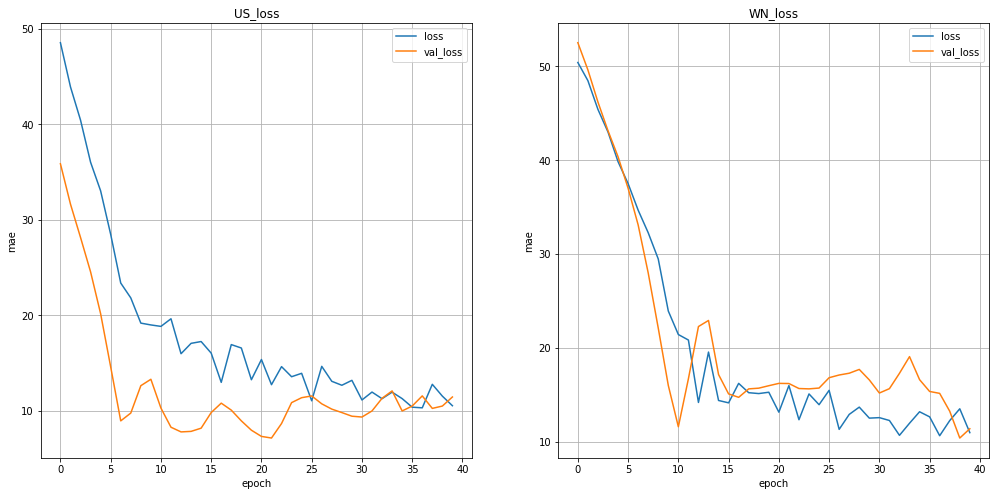

In [31]:
#show learning curves
#mean training loss measured over each epoch
#mean validation loss measured at the end of each epoch
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17,8))
US_plot = pd.DataFrame(t_US_history.history) #selecting columns
WN_plot = pd.DataFrame(t_WN_history.history)
US_plot.plot(ax=axes[0],title="US_loss",xlabel='epoch',ylabel='mae').grid(True)
WN_plot.plot(ax=axes[1],title="WN_loss",xlabel='epoch',ylabel='mae').grid(True)
plt.savefig("plots/raw_data.png")

In [37]:
print(t_US_error_scores)
t_US_error=np.mean(t_US_error_scores)
print(t_US_error)
print(t_WN_error_scores)
t_WN_error=np.mean(t_WN_error_scores)
print(t_WN_error)

[12.221261978149414, 17.504308700561523, 11.549159049987793, 13.949458122253418, 11.443012237548828]
13.333440017700195
[15.702159881591797, 15.251704216003418, 14.510367393493652, 16.58871841430664, 11.411787033081055]
14.692947387695312


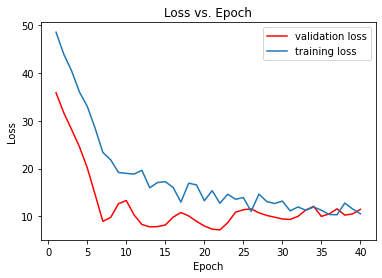

In [33]:
def plot_loss(history):
        train_loss=history.history['loss']
        val_loss=history.history['val_loss']
        x=list(range(1,len(val_loss)+1))
        plt.plot(x,val_loss,color='red',label='validation loss')
        plt.plot(x,train_loss,label='training loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epoch')
        plt.legend()

plot_loss(t_US_history)

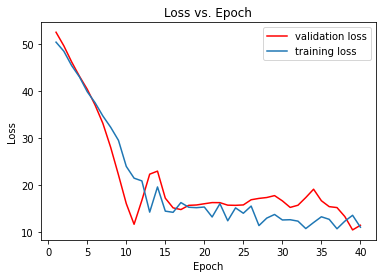

In [34]:
plot_loss(t_WN_history)

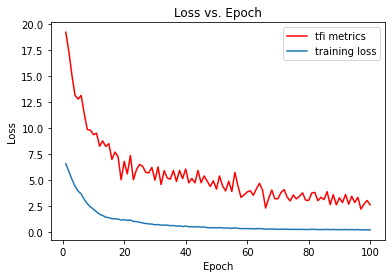

In [35]:
def plot_loss(history):
        train_loss=history.history['loss']
        train_metrics=history.history['error_in_tfi']
        x=list(range(1,len(train_metrics)+1))
        plt.plot(x,train_metrics,color='red',label='tfi metrics')
        plt.plot(x,train_loss,label='training loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epoch')
        plt.legend()

plot_loss(US_history)

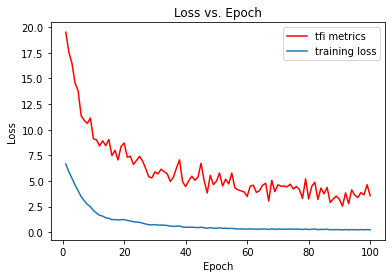

In [36]:
def plot_loss(history):
        train_loss=history.history['loss']
        train_metrics=history.history['error_in_tfi']
        x=list(range(1,len(train_metrics)+1))
        plt.plot(x,train_metrics,color='red',label='tfi metrics')
        plt.plot(x,train_loss,label='training loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epoch')
        plt.legend()

plot_loss(WN_history)